In [1]:
import numpy as np
import pandas as pd 

In [19]:
df = pd.read_csv('wu_songs.csv')
df = df.drop(['time_signature', 'key', 'duration_ms', 'mode', 'type', 'uri'], axis =1)
df

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,loudness,valence
0,0.979,0.2720,128.876,0.1220,0.007620,0.015200,0.410,-3.481,0.080
1,0.861,0.0747,100.080,0.0493,0.001890,0.000539,0.518,-6.998,0.317
2,0.963,0.2030,195.979,0.1590,0.000090,0.000304,0.356,-4.385,0.379
3,0.968,0.1060,158.089,0.1370,0.000047,0.000006,0.365,-4.267,0.386
4,0.327,0.0922,75.122,0.0489,0.605000,0.000012,0.434,-10.161,0.260
...,...,...,...,...,...,...,...,...,...
1918,0.379,0.0986,107.989,0.0476,0.607000,0.000464,0.614,-10.480,0.201
1919,0.733,0.3290,93.019,0.0720,0.006200,0.000000,0.748,-4.421,0.291
1920,0.437,0.1160,103.921,0.0363,0.440000,0.000000,0.769,-6.406,0.737
1921,0.841,0.1330,100.003,0.0391,0.015600,0.000000,0.743,-5.189,0.814


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [72]:
#資料標準化
scaler = StandardScaler().fit_transform(df)
df_standard = pd.DataFrame(scaler)

# df_standard.rename(columns = {0:'energy', 1:'liveness', 2:'tempo', 3:'speechiness', 4:'acousticness',
#                               5:'instrumentalness', 6:'danceability', 7:'loudness', 8:'valence', }, inplace = True)
df_standard

,0,1,2,3,4,5,6,7,8
0,0.999384,0.478467,0.020721,0.795722,-0.472349,-0.437276,-0.466945,0.871404,-1.364559
1,0.430682,-0.856620,-0.983635,-0.444491,-0.496959,-0.488644,0.294586,-0.333147,-0.127109
2,0.922272,0.011559,2.361158,1.426918,-0.504691,-0.489467,-0.847710,0.561790,0.196612
3,0.946369,-0.644819,1.039620,1.051612,-0.504872,-0.490512,-0.784249,0.602204,0.233161
4,-2.142935,-0.738201,-1.854127,-0.451315,2.093298,-0.490490,-0.297716,-1.416456,-0.424724
...,...,...,...,...,...,...,...,...,...
1918,-1.892320,-0.694893,-0.707782,-0.473492,2.101887,-0.488907,0.971501,-1.525712,-0.732781
1919,-0.186215,0.864173,-1.229910,-0.057244,-0.478448,-0.490532,1.916363,0.549460,-0.262863
1920,-1.612789,-0.577151,-0.849667,-0.666262,1.384650,-0.490532,2.064438,-0.130391,2.065840
1921,0.334292,-0.462116,-0.986320,-0.618496,-0.438076,-0.490532,1.881107,0.286424,2.467881


In [97]:
df_test = pd.concat((df_standard[0], df_standard[1]) , axis =1)
df_test

,0,1
0,0.999384,0.478467
1,0.430682,-0.856620
2,0.922272,0.011559
3,0.946369,-0.644819
4,-2.142935,-0.738201
...,...,...
1918,-1.892320,-0.694893
1919,-0.186215,0.864173
1920,-1.612789,-0.577151
1921,0.334292,-0.462116


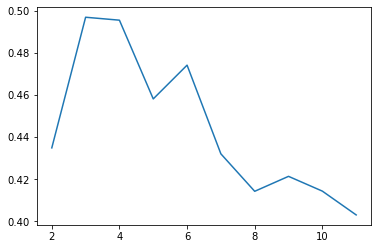

In [98]:
import matplotlib.pyplot as plt

silhouette_avg = []
for i in range(2,12):
    kmeans_fit = KMeans(n_clusters = i ,random_state=15 ).fit(df_test)
    silhouette_avg.append(silhouette_score(df_test, kmeans_fit.labels_))
    
plt.plot(range(2,12), silhouette_avg)

